In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, datetime

In [2]:
raw_df = pd.read_csv('raw_data.csv')

pd.set_option('display.max_columns', None)
raw_df.drop('ID', axis=1, inplace=True)

In [3]:
raw_df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [4]:
#The values 'Alone', 'Absurd', and 'YOLO' need to be changed to just be 'Single' for consistency.

raw_df['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [5]:
raw_df.loc[raw_df['Marital_Status'].isin(['Alone','Absurd','YOLO']), 'Marital_Status'] = 'Single'

In [6]:
raw_df['Education'].value_counts()

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

In [7]:
#Making a new column with the age of each person.

raw_df['Age'] = date.today().year - raw_df['Year_Birth']

In [8]:
#Converting the 'Dt_Customer' column to a specific date format.

date_format = '%Y-%m-%d'

for i in raw_df['Dt_Customer']:
    i = datetime.strptime(i, date_format)

raw_df['Dt_Customer'] = pd.to_datetime(raw_df['Dt_Customer'], format=date_format)

In [9]:
#Making a new column with the number of days an individual has been a customer.

for i in raw_df:
    raw_df['Days_As_Customer'] = datetime.now() - raw_df['Dt_Customer']
    raw_df['Days_As_Customer'] = raw_df['Days_As_Customer'] / np.timedelta64(1, 'D')

raw_df['Days_As_Customer'] = raw_df['Days_As_Customer'].astype(int)

In [10]:
#Checking to see I got the intended results.

raw_df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Days_As_Customer
0,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,67,4357
1,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,70,3807
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,59,4006
3,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,40,3833
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,43,3855


In [11]:
#Looking at the descriptions of my numeric variables. I use this to get a general idea of the values and find any outliers/inconsistencies.

raw_df.describe()

,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Days_As_Customer
count,2240.000000,2216.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000,2240.000000,2240.000000
mean,1968.805804,52247.251354,0.444196,0.506250,2013-07-10 10:01:42.857142784,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107,55.194196,4047.582143
min,1893.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,28.000000,3694.000000
25%,1959.000000,35303.000000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,47.000000,3874.750000
50%,1970.000000,51381.500000,0.000000,0.000000,2013-07-08 12:00:00,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,54.000000,4049.500000
75%,1977.000000,68522.000000,1.000000,1.000000,2013-12-30 06:00:00,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,65.000000,4223.000000
max,1996.000000,666666.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,131.000000,4393.000000
std,11.984069,25173.076661,0.538398,0.544538,NaN,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274,11.984069,202.122512


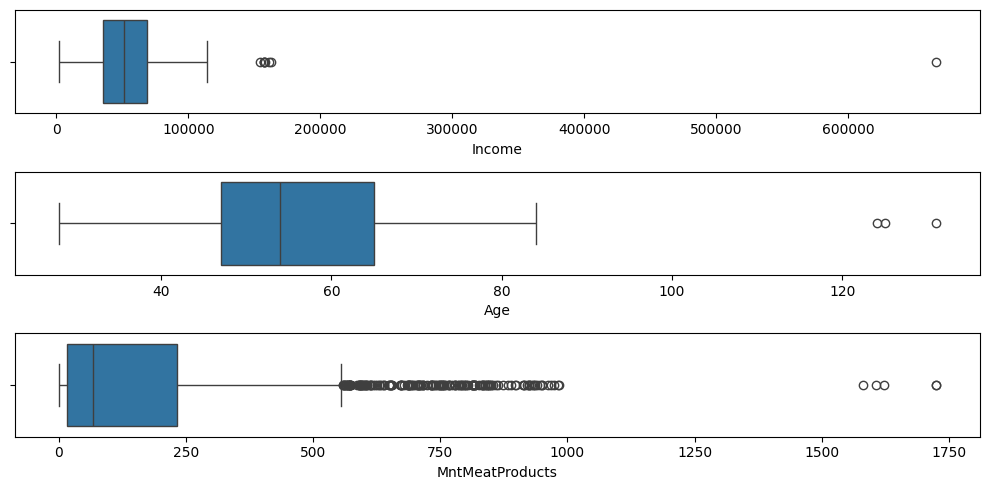

In [12]:
#From the description of numerical data, I want to take a closer look at 'Income', 'Age', and 'MntMeatProducts' since they have a very high max value.

#The extreme outlier from the 'Income' variable will need to be transformed or simply removed, I don't want it affecting any charts I make.
#The 'Age' outliers also need to be transformed to average age most likely. No point in removing the data point, but further inspection is needed to pick the best course of action.
#I will take a closer look at the extreme outliers of the 'MntMeatProducts' variable to see if there is anything strange going on with those.

custom_columns = raw_df[['Income','Age','MntMeatProducts']]

fig, axs = plt.subplots(3, figsize=(10,5), layout='tight', sharey=True)
columns = custom_columns.columns

for ax, title in zip(axs.flat, columns):
    sns.boxplot(custom_columns[title], orient='h', ax=ax)

In [13]:
#The only strange thing about these individuals seems to be their high age. I will convert the age to be the average so as to not lose these data points.

raw_df.loc[raw_df['Age'] > 100]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Days_As_Customer
192,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,6,8,7,4,25,1,2,1,2,5,0,0,0,0,0,1,3,11,0,124,3970
239,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,0,5,7,0,2,1,1,0,2,4,0,0,0,0,0,0,3,11,0,131,3737
339,1899,PhD,Together,83532.0,0,0,2013-09-26,36,755,144,562,104,64,224,1,4,6,4,1,0,0,1,0,0,0,3,11,0,125,3970


In [14]:
#1st thing I notice is that, apart from Index 22 & 2228, the income for these people is very high, making it reasonable for them to be able to purchase so much meat.
#2nd thing I notice is that these individuals are buying a lot of meat, buy very little amounts of other things. Possibly buying their meat in bulk from this particulare seller.
#3rd thing I notice is that all of these individuals are buying their meat from catalog mostly, possibly from some catalog-specific promotion. 

#I am going to simply remove Index 22 & 2228. Setting their income to the average wouldn't make sense with the extremely high meat purchases. The others I will leave as is.

raw_df.loc[raw_df['MntMeatProducts'] > 1000].sort_values('MntMeatProducts')

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Days_As_Customer
164,1973,PhD,Married,157243.0,0,1,2014-03-01,98,20,2,1582,1,2,1,15,0,22,0,0,0,0,0,0,0,0,3,11,0,51,3814
2228,1978,2n Cycle,Together,NaN,0,0,2012-08-12,53,32,2,1607,12,4,22,0,0,0,1,0,0,1,0,0,0,0,3,11,0,46,4380
687,1982,PhD,Married,160803.0,0,0,2012-08-04,21,55,16,1622,17,3,4,15,0,28,1,0,0,0,0,0,0,0,3,11,0,42,4388
21,1979,Graduation,Married,2447.0,1,0,2013-01-06,42,1,1,1725,1,1,1,15,0,28,0,1,0,0,0,0,0,0,3,11,0,45,4233
1653,1977,Graduation,Together,157146.0,0,0,2013-04-29,13,1,0,1725,2,1,1,0,0,28,0,1,0,0,0,0,0,0,3,11,0,47,4120


In [15]:
#The only strange thing about this individual is the high 'Income'. 

#Since they arent buying an egregious amount of any product, I will simply set this income value to the average so as to not lose this data point.

raw_df.loc[raw_df['Income'] > 600000]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Days_As_Customer
2233,1977,Graduation,Together,666666.0,1,0,2013-06-02,23,9,14,18,8,1,12,4,3,1,3,6,0,0,0,0,0,0,3,11,0,47,4086


In [16]:
raw_df.loc[raw_df['Age'] > 100, 'Age'] = raw_df['Age'].mean() #Converting 'Age' outliers to the 'Age' mean.

index_to_drop = [22, 2228]
raw_df.drop(index=index_to_drop, inplace=True) #Dropping the two 'MntMeatProducts' outliers.

raw_df.loc[raw_df['Income'] > 600000, 'Income'] = raw_df['Income'].mean() #Converting the 'Income' outlier to the mean.

C:\Users\Thomas Campana\AppData\Local\Temp\ipykernel_19872\1676088301.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '55.19419642857143' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  raw_df.loc[raw_df['Age'] > 100, 'Age'] = raw_df['Age'].mean() #Converting 'Age' outliers to the 'Age' mean.


In [17]:
raw_df.duplicated().sum() #Checking for duplicate values.

184

In [18]:
raw_df.drop_duplicates(inplace=True) #Removing duplicate values.

In [19]:
raw_df.isna().sum() #Checking for any null values.

Year_Birth              0
Education               0
Marital_Status          0
Income                 23
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Days_As_Customer        0
dtype: int64

In [20]:
#I see no point to removing all these values. I want to just input the mean income on all these, but first I will see if there is a strong distinction between 'Education' and 'Income'.
raw_df.loc[raw_df['Income'].isna()]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Days_As_Customer
10,1983,Graduation,Married,NaN,1,0,2013-11-15,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0,41.0,3920
27,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,3,11,0,38.0,4188
43,1959,PhD,Single,NaN,0,0,2013-11-05,80,81,11,50,3,2,39,1,1,3,4,2,0,0,0,0,0,0,3,11,0,65.0,3930
48,1951,Graduation,Single,NaN,2,1,2014-01-01,96,48,5,48,6,10,7,3,2,1,4,6,0,0,0,0,0,0,3,11,0,73.0,3873
58,1982,Graduation,Single,NaN,1,0,2013-06-17,57,11,3,22,2,2,6,2,2,0,3,6,0,0,0,0,0,0,3,11,0,42.0,4071
71,1973,2n Cycle,Married,NaN,1,0,2012-09-14,25,25,3,43,17,4,17,3,3,0,3,8,0,0,0,0,0,0,3,11,0,51.0,4347
90,1957,PhD,Married,NaN,2,1,2012-11-19,4,230,42,192,49,37,53,12,7,2,8,9,0,0,0,0,0,0,3,11,0,67.0,4281
91,1957,Graduation,Single,NaN,1,1,2014-05-27,45,7,0,8,2,0,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0,67.0,3727
92,1973,Master,Together,NaN,0,0,2013-11-23,87,445,37,359,98,28,18,1,2,4,8,1,0,0,0,0,0,0,3,11,0,51.0,3912
128,1961,PhD,Married,NaN,0,1,2013-07-11,23,352,0,27,10,0,15,3,6,1,7,6,0,0,0,0,0,0,3,11,0,63.0,4047


<Axes: xlabel='Education', ylabel='Income'>

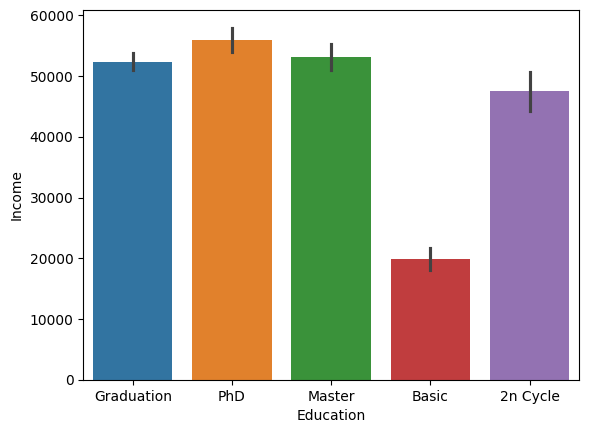

In [21]:
#There is only a strong distinction when the 'Education' == 'Basic'. 
#Since none of the null values have a 'basic' Education, I will make them all the mean 'Income' of those beyond a 'Basic' Education.

sns.barplot(raw_df, x='Education', y='Income', hue='Education')

In [22]:
higher_ed = ['Graduation','PhD','Master Education','2n Cycle']

raw_df.loc[raw_df['Income'].isna(), 'Income'] = raw_df.loc[raw_df['Education'].isin(higher_ed), 'Income'].mean() #Converting null 'Income' values to higher_ed mean 'Income'.

In [23]:
#Now I will remove any columns that I do not need anymore.
#I will remove 'Dt_Customer' and 'Year_Birth' because I made 'Days_As_Customer' and 'Age' columns respectively.
#I will also remove the 'Z_CostContact' and 'Z_Revenue' columns because the data set did not describe what these variables represent and I do not want to guess their meaning.

raw_df.drop(['Z_CostContact','Z_Revenue','Dt_Customer','Year_Birth'], axis=1, inplace=True)

In [24]:
#I am adding a 'Total Products Purchased' and 'Total AcceptedCmp' column for EDA.

raw_df['Total_Purchases'] = raw_df['MntWines'] + raw_df['MntFruits'] + raw_df['MntMeatProducts'] + raw_df['MntFishProducts'] + raw_df['MntSweetProducts'] + raw_df['MntGoldProds']
raw_df['Total_AcceptedCmp'] = raw_df['AcceptedCmp1'] + raw_df['AcceptedCmp2'] + raw_df['AcceptedCmp3'] + raw_df['AcceptedCmp4'] + raw_df['AcceptedCmp5'] + raw_df['Response']

In [25]:
#Making a boolean value of whether or not a customer accepted any campaign where 1 = Accepted and 0 = Not Accepted.

raw_df['AcceptedAnyCmp'] = 0
raw_df['AcceptedAnyCmp'].where(raw_df['Total_AcceptedCmp'] == 0, 1, inplace=True)

C:\Users\Thomas Campana\AppData\Local\Temp\ipykernel_19872\1114219514.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  raw_df['AcceptedAnyCmp'].where(raw_df['Total_AcceptedCmp'] == 0, 1, inplace=True)


In [26]:
raw_df.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Age', 'Days_As_Customer', 'Total_Purchases',
       'Total_AcceptedCmp', 'AcceptedAnyCmp'],
      dtype='object')

In [27]:
#Rearranging the columns for quality of life.

raw_df = raw_df[['Age', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'Days_As_Customer', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Total_Purchases',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Total_AcceptedCmp', 'AcceptedAnyCmp', 'Complain']]

In [28]:
#Double checking everything is as I want it.

raw_df.head()

,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Days_As_Customer,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Total_Purchases,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Total_AcceptedCmp,AcceptedAnyCmp,Complain
0,67.0,Graduation,Single,58138.0,0,0,58,4357,635,88,546,172,88,88,1617,3,8,10,4,7,0,0,0,0,0,1,1,1,0
1,70.0,Graduation,Single,46344.0,1,1,38,3807,11,1,6,2,1,6,27,2,1,1,2,5,0,0,0,0,0,0,0,0,0
2,59.0,Graduation,Together,71613.0,0,0,26,4006,426,49,127,111,21,42,776,1,8,2,10,4,0,0,0,0,0,0,0,0,0
3,40.0,Graduation,Together,26646.0,1,0,26,3833,11,4,20,10,3,5,53,2,2,0,4,6,0,0,0,0,0,0,0,0,0
4,43.0,PhD,Married,58293.0,1,0,94,3855,173,43,118,46,27,15,422,5,5,3,6,5,0,0,0,0,0,0,0,0,0


In [29]:
#I feel satisfied with this cleaned data set. I will not export it to a new csv for EDA and ML models.

raw_df.to_csv('cleaned_df.csv')